In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as ppt
from scipy import signal
from sklearn.preprocessing import StandardScaler

In [39]:
data = pd.read_csv(r"cannae.csv")
births1 = data.iloc[0:139,1].values
births2 = data.iloc[139:,1].values
years1 = data.iloc[0:139,0].values
years2 = data.iloc[139:,0].values
years = data.iloc[:,0].values
unity = data.iloc[:,3].values
print(unity)

[  59.21312895   99.75649345  121.6300935   124.8339291   133.7709703
  148.441217    168.8446693   194.9813272   222.4103007   251.1315896
  281.1451941   312.4511141   340.1734209   364.3121145   384.8671949
  401.8386621   422.9468341   448.1917109   477.5732925   511.0915789
  540.9852475   567.2542983   589.8987313   608.9185465   626.9182632
  643.8978814   659.8574011   674.7968223   695.350671    721.5189472
  753.3016509   790.6987821   822.6621813   849.1918485   870.2877837
  885.9499869   901.2161784   916.0863582   930.5605263   944.6386827
  966.5043159   996.1574259  1033.598013   1078.826076   1119.729663
 1156.308773   1188.563407   1216.493564   1246.764759   1279.376993
 1314.330266   1351.624578   1382.607324   1407.278503   1425.638117
 1437.686165   1450.784231   1464.932315   1480.130417   1496.378537
 1511.694667   1526.078808   1539.530958   1552.051118   1565.475093
 1579.802881   1595.034483   1611.169898   1627.749284   1644.77264
 1662.239966   1680.151262 

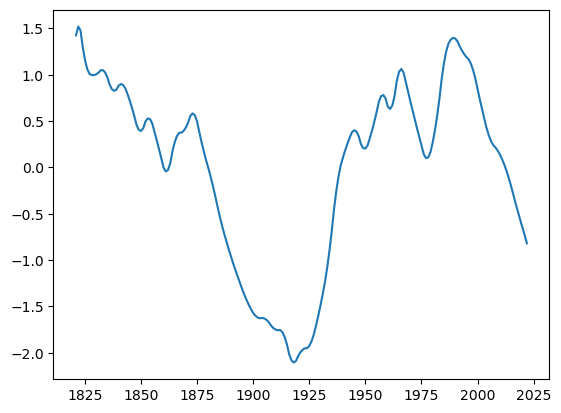

In [40]:
scaler=StandardScaler()
unity = signal.detrend(unity)
unity1 = np.stack((years,unity),axis=1)
unity_scaled = scaler.fit_transform(unity1)
unity = unity_scaled[:,1]
ppt.plot(years,unity)

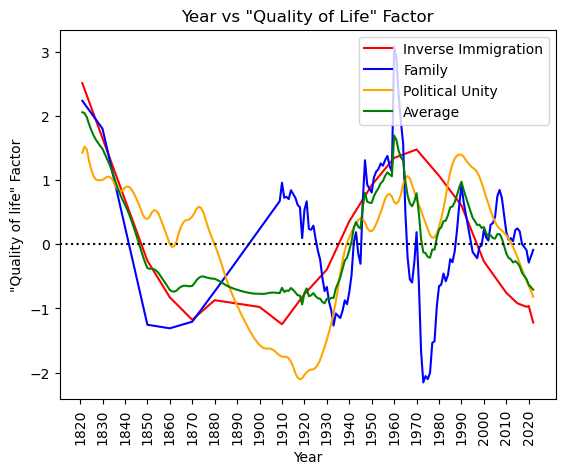

In [41]:
births_det=signal.detrend(births1)
births_det1=signal.detrend(births2)
fb1 = scaler.fit_transform(np.stack((births_det,years1),axis=1))
fb2 = scaler.fit_transform(np.stack((births_det1,years2),axis=1))
ind = np.append(fb1[:,0],fb2[:,0],axis=0)
ppt.figure()
idet = data.iloc[:,2]
yo = np.stack((years,idet),axis=1)
oy = scaler.fit_transform(yo)
idet = oy[:,1]
total = (idet+ind+unity)/3
ppt.plot(years,idet,color="red")
ppt.plot(years,ind,color="blue")
ppt.plot(years,unity,color="orange")
ppt.plot(years,total,color="green")
ppt.title("Year vs \"Quality of Life\" Factor")
ppt.xlabel("Year")
ppt.ylabel("\"Quality of life\" Factor")
ppt.axhline(y=0,color="black",linestyle="dotted")
ppt.xticks(np.arange(1820,2025,10),rotation="vertical")
ppt.legend(['Inverse Immigration','Family','Political Unity','Average'])
ppt.savefig('complete.png')

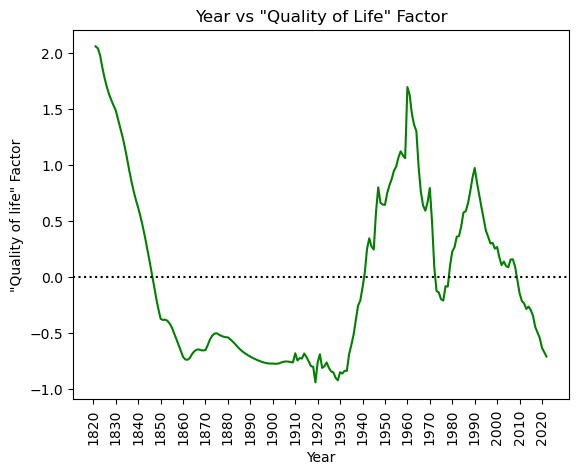

In [42]:
ppt.plot(years,total,color="green")
ppt.title("Year vs \"Quality of Life\" Factor")
ppt.xlabel("Year")
ppt.ylabel("\"Quality of life\" Factor")
ppt.axhline(y=0,color="black",linestyle="dotted")
ppt.xticks(np.arange(1820,2021,10),rotation="vertical")
ppt.savefig('main.png')

In [43]:
print(total[-1]) # number in 2022
print(total[40]) #number in 1861
print(total[112]) # number in 1933
print(total[152]) #number in 1973
print(total[-13])#number in 2010
print(total[-11])#number in 2012

-0.7095772993556437
-0.735351252349492
-0.8373558257917305
-0.12607792195238782
-0.1440705151186428
-0.2350553839346942


In [44]:
print(total[169]) # number in 1990
print(total[139]) # number in 1960
print(total[100]) # number in 1921

0.9717440924235253
1.692689743835983
-0.6891217817113087
